In [25]:
import pandas as pd
import yaml
import matplotlib.pyplot as plt
grn_models = ['positive_control', 'granie', 'figr', 'celloracle', 'scglue', 'scenicplus']
datasets = ['pearson', 'lognorm', 'seurat_pearson', 'seurat_lognorm', 'scgen_pearson', 'scgen_lognorm']
# grn_models = ['celloracle', 'scenicplus']
%matplotlib inline

    

In [26]:

# Load the YAML file and create matrix scores 
base_folder = '../resources/results/subsample_200_ridge/'
result_file = f'{base_folder}/scores.yaml'
with open(result_file, 'r') as file:
    data = yaml.safe_load(file)

# Initialize a dictionary to hold DataFrames for each method_id
dfs = {}

# Process each entry in the YAML file
for entry in data:
    method_id = entry['method_id']
    dataset_id = entry['dataset_id']
    
    # If the method_id is not yet in the dictionary, initialize an empty DataFrame
    if method_id not in dfs:
        dfs[method_id] = pd.DataFrame()
    
    # Create a dictionary with metric_ids as keys and metric_values as values
    metrics_dict = dict(zip(entry['metric_ids'], entry['metric_values']))
    
    # Convert the dictionary to a DataFrame with dataset_id as the index
    df_entry = pd.DataFrame(metrics_dict, index=[dataset_id])
    
    # Append the entry to the corresponding DataFrame
    dfs[method_id] = pd.concat([dfs[method_id], df_entry])


In [27]:
dfs.keys()

dict_keys(['reg1-figr', 'reg2-scglue', 'reg1-scenicplus', 'reg1-granie', 'reg2-granie', 'reg1-scglue', 'reg1-celloracle', 'reg2-figr', 'reg2-positive_control', 'reg2-scenicplus', 'reg1-positive_control', 'reg2-celloracle', 'reg1-negative_control', 'reg2-negative_control'])

In [28]:
df_grn_dict = {}
for name in grn_models:
    df_grn = pd.concat([dfs.get(f'reg1-{name}'), dfs.get(f'reg2-{name}')], axis=1)
    print(name)
    df_grn_dict[name] = df_grn
df_grn.columns

positive_control
granie
figr
celloracle
scglue
scenicplus


Index(['ex(True)_tf(-1)', 'ex(False)_tf(-1)', 'ex(True)_tf(140)',
       'ex(False)_tf(140)', 'Mean', 'static-theta-0.0', 'static-theta-0.5',
       'static-theta-1.0', 'Mean'],
      dtype='object')

In [29]:
def headmap(scores, ax=None, name=''):
    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(4, 4), sharey=True)
    scores = scores.astype(float)
    vmin = 0
    vmax = np.nanmax(scores)

    seaborn.heatmap(scores, ax=ax, square=False, cbar=False, annot=True, fmt='.2f', vmin=vmin, vmax=vmax)
    # Remove only the ticks, keep labels
    ax.tick_params(left=False, bottom=False)
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=0)
    ax.set_title(name, pad=10)

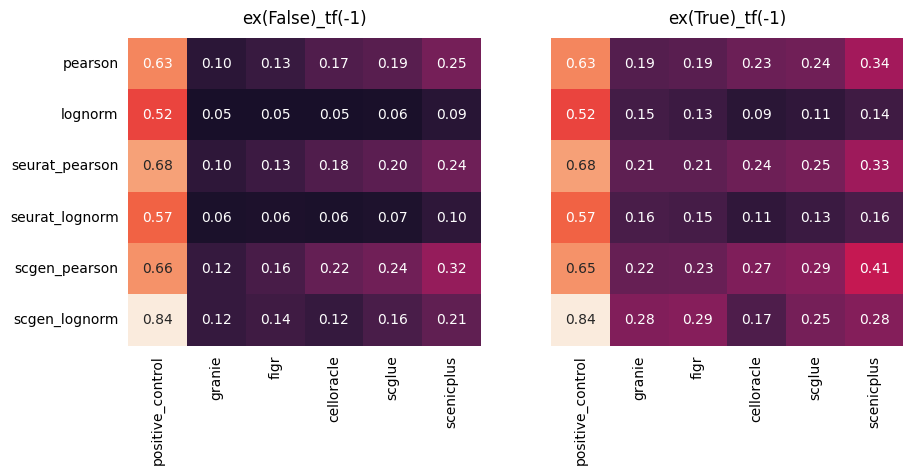

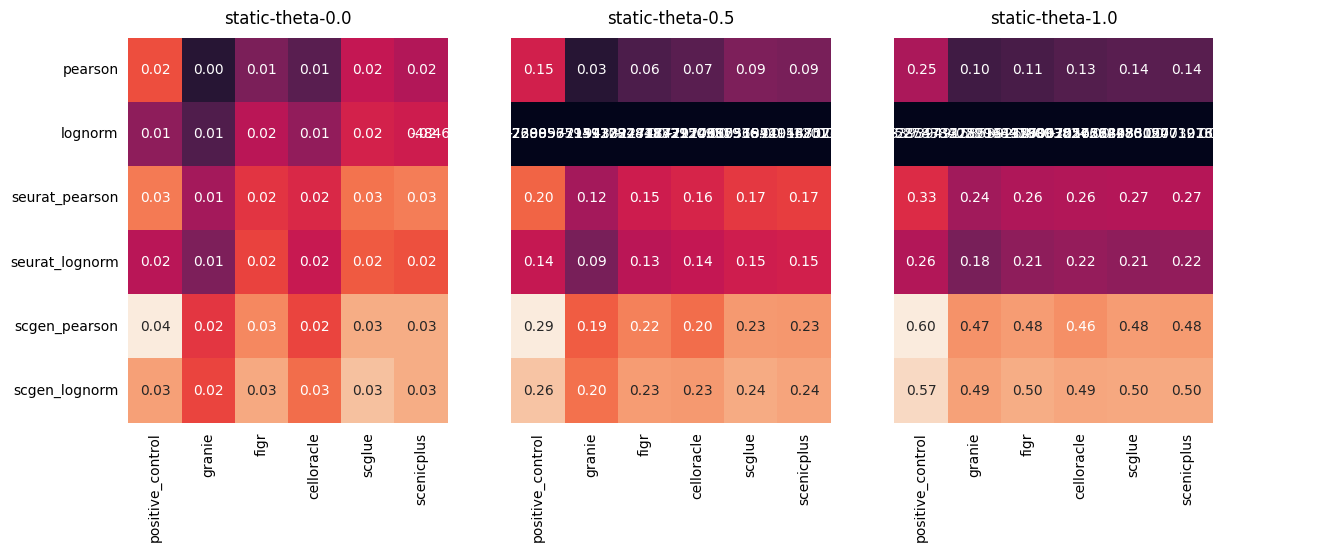

In [30]:
def extract_col(col):
    scores = pd.DataFrame()
    for name, df in df_grn_dict.items():
        scores[name] = df[col]
    scores = scores.loc[datasets]
    return scores

fig, axes = plt.subplots(1,2, figsize=(10, 4), sharey=True)

ax =axes[0]
col = 'ex(False)_tf(-1)'
scores = extract_col(col)
fig = headmap(scores, name=col, ax=ax)

ax =axes[1]
col = 'ex(True)_tf(-1)'
scores = extract_col(col)
fig = headmap(scores, name=col, ax=ax)
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(14,5), sharey=True)


ax =axes[0]
col = 'static-theta-0.0'
scores = extract_col(col)
fig = headmap(scores, name=col, ax=ax)

ax =axes[1]
col = 'static-theta-0.5'
scores = extract_col(col)
fig = headmap(scores, name=col, ax=ax)

ax =axes[2]
col = 'static-theta-1.0'
scores = extract_col(col)
fig = headmap(scores, name=col, ax=ax)

# plt.subplots_adjust(wspace=0.5)  
plt.show()

In [31]:
aa

NameError: name 'aa' is not defined

# Infer

In [ ]:
pd.read_csv('../resources/results/celloracle_test/trace.txt', sep='\t')

,task_id,hash,native_id,name,status,exit,submit,duration,realtime,%cpu,peak_rss,peak_vmem,rchar,wchar
0,1,d9/37475e,632268be-47c1-4428-b8f6-7db9f614a18c,run_grn_inference:run_wf:celloracle:processWf:...,COMPLETED,0,2024-08-11 19:45:58.615,19m 27s,12m 45s,122.8%,3.9 GB,27.4 GB,15.1 GB,11.2 GB
1,2,4d/33d91d,73a9e0a9-2bd5-4c71-9a1c-050d92885448,run_grn_inference:publishStatesSimpleWf:publis...,COMPLETED,0,2024-08-11 20:05:26.439,19.1s,0ms,94.7%,0,0,75.8 KB,42.2 KB


In [ ]:
df = pd.read_csv('../resources/results/celloracle/celloracle/base_grn.csv')

In [ ]:
# import celloracle as co
# links_o = co.load_hdf5('../resources/results/celloracle/celloracle/links.celloracle.links')
# links_dict =  links_o.links_dict.copy()
grn_stack = []
tt = 0.05
for cell_type, grn in links_dict.items():
    print(f"{cell_type}, GRN before filter: {grn.shape}")
    aa 
#     mask = grn.p<tt # remove insig links
#     grn = grn[mask]
#     grn = grn[~(grn.coef_abs==0)] # remove those with 0 coeff
#     # filter based on z score 
#     z_scores = (grn.coef_abs - grn.coef_abs.mean())/grn.coef_abs.std()
#     mask = z_scores > 2
#     grn = grn.loc[mask, :]

#     grn = grn[['source', 'target', 'coef_mean']]

#     grn.columns = ['source', 'target', 'weight']

#     print(cell_type, 'links:', len(grn), ' TFs: ', grn.source.unique().shape[0], ' target: ', grn.target.unique().shape[0],)    
#     grn['cell_type'] = cell_type
#     grn_stack.append(grn)
# celloracle_grn = pd.concat(grn_stack).reset_index(drop=True)

B cells, GRN before filter: (60073, 6)


NameError: name 'aa' is not defined

In [ ]:
grn.target.nunique()

1847

In [ ]:

import requests

# Send a GET request to the URL
response = requests.get("https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_45/gencode.v45.annotation.gtf.gz")

# Check if the request was successful
if response.status_code == 200:
    # Write the content to a file
    with open("gencode.v45.annotation.gtf.gz", 'wb') as file:
        file.write(response.content)
    print(f"File downloaded and saved as {output_file}")
else:
    print(f"Failed to download the file. Status code: {response.status_code}")


KeyboardInterrupt: 